# Introduction
In this notebook we will look at the offensive efficiency rating has changed for the Golden State Warriors(GSW) in comparison to the rest of the NBA. We will also visualise how GSW focused more on the 3 point shot.

# Notebook Objectives
We are interested in three questions:
1. How has offensive efficiency of GSW changed?<br><br>
2. How has the defensive efficiency of GSW changed?<br><br>
3. How does the 3 point shot factor in to this?

# Setup
## Imports

In [21]:
from datetime import datetime, timedelta

import pandas as pd

import numpy as np

import matplotlib.pylab as plt
from matplotlib.ticker import ScalarFormatter, StrMethodFormatter

import seaborn as sns

import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatch
from matplotlib.patches import FancyBboxPatch

## Parameters

In [22]:
TEAM_SEASONAL_EFFICIENCY_DATASET = '../../../data/processed/111_seasonal_efficiency.csv'

## Configuration

In [23]:
%matplotlib inline

sns.set_context('talk')
sns.set_style("white")

# Read in data

In [24]:
seasonal_df = pd.read_csv(TEAM_SEASONAL_EFFICIENCY_DATASET)
seasonal_df.dtypes

SEASON               int64
TEAM_ID              int64
TEAM_NAME           object
GAME_ID              int64
FGM                float64
FGA                float64
FG_PCT             float64
FG3M               float64
FG3A               float64
FG3_PCT            float64
FTM                float64
FTA                float64
FT_PCT             float64
OREB               float64
DREB               float64
REB                float64
AST                float64
STL                float64
BLK                float64
TO                 float64
PF                 float64
PTS                float64
POSSESSIONS        float64
PPP                float64
OER                float64
OPP_PTS            float64
DER                float64
POSSESSIONS_OPP    float64
NER                float64
OPP_PPP            float64
CONFERENCE          object
dtype: object

In [25]:
seasonal_df = seasonal_df.set_index(['SEASON', 'TEAM_NAME'])
seasonal_df.head()

TEAM_ID     GAME_ID     FGM     FGA    FG_PCT   FG3M  \
SEASON TEAM_NAME                                                            
2003   Hawks      1610612737  1674947672  2857.0  6609.0  0.432289  422.0   
       Celtics    1610612738  1836147889  2994.0  6775.0  0.441919  577.0   
       Cavaliers  1610612739  1685248550  2992.0  6903.0  0.433435  254.0   
       Pelicans   1610612740  1946749139  2977.0  7139.0  0.417005  572.0   
       Bulls      1610612741  1654647953  2781.0  6721.0  0.413778  425.0   

                    FG3A   FG3_PCT     FTM     FTA  ...     PTS  POSSESSIONS  \
SEASON TEAM_NAME                                    ...                        
2003   Hawks      1256.0  0.335987  1555.0  2004.0  ...  7691.0       7467.0   
       Celtics    1676.0  0.344272  1673.0  2229.0  ...  8238.0       7917.0   
       Cavaliers   804.0  0.315920  1564.0  2087.0  ...  7802.0       7576.0   
       Pelicans   1796.0  0.318486  1567.0  2082.0  ...  8093.0       7813.0   
       Bulls      1241.0  0.342466  1329.0  1835.0  ...  7316.0       7432.0   

                       PPP         OER  OPP_PTS         DER  POSSESSIONS_OPP  \
SEASON TEAM_NAME                                                               
2003   Hawks      1.029999  102.999866   8075.0  108.084594           7471.0   
       Celtics    1.040546  104.054566   8439.0  105.672427           7986.0   
       Cavaliers  1.029831  102.983105   8010.0  105.826397           7569.0   
       Pelicans   1.035838  103.583771   8122.0  104.154912           7798.0   
       Bulls      0.984392   98.439182   7829.0  105.285100           7436.0   

                       NER   OPP_PPP  CONFERENCE  
SEASON TEAM_NAME                                  
2003   Hawks     -5.084728  1.080846        East  
       Celtics   -1.617861  1.056724        East  
       Cavaliers -2.843293  1.058264        East  
       Pelicans  -0.571141  1.041549        West  
       Bulls     -6.845918  1.052851        East  

[5 rows x 29 columns]

# Restructure data
We will, again, be using parallel coordinate plots to visualise the OER of GSW.

In [26]:
graph_df = seasonal_df.reset_index()[['TEAM_NAME', 'SEASON', 'OER']]
graph_df.head()

TEAM_NAME  SEASON         OER
0      Hawks    2003  102.999866
1    Celtics    2003  104.054566
2  Cavaliers    2003  102.983105
3   Pelicans    2003  103.583771
4      Bulls    2003   98.439182

In [27]:
gsw_df = graph_df.pivot(index='TEAM_NAME', columns='SEASON', values='OER')[[2011,2012,2013,2014,2015,2016,2017,2018]]

Get league average

In [28]:
tmp = gsw_df.reset_index().copy()
tmp['TEAM_NAME'] = 'League Average'
final = tmp.groupby(['TEAM_NAME']).mean().copy()
final

SEASON                2011        2012        2013        2014        2015  \
TEAM_NAME                                                                    
League Average  106.361248  107.463829  108.331045  107.521333  108.239406   

SEASON                2016        2017        2018  
TEAM_NAME                                           
League Average  110.735799  110.760855  112.385023

Get GSW average

In [29]:
gsw_df.reset_index()[gsw_df.reset_index()['TEAM_NAME'] == 'Warriors'].reset_index().set_index('TEAM_NAME')

SEASON     index        2011        2012        2013        2014        2015  \
TEAM_NAME                                                                      
Warriors      28  107.603948  108.525812  108.859928  113.940538  115.928962   

SEASON           2016        2017        2018  
TEAM_NAME                                      
Warriors   118.381858  117.306011  118.369626

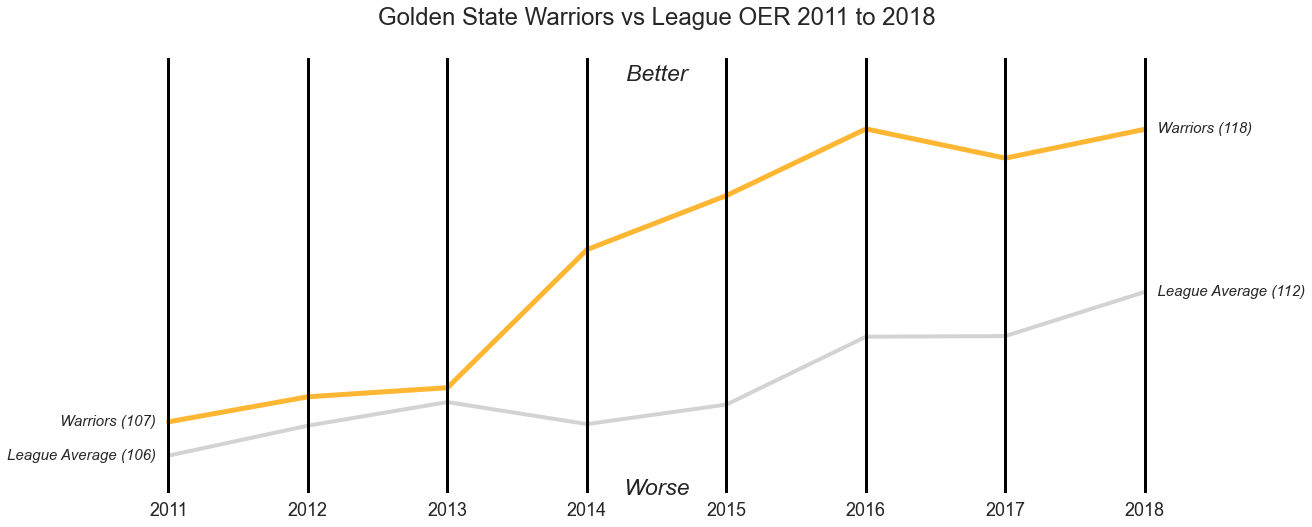

In [30]:
plt.figure(figsize=(18,8))
ax = pd.plotting.parallel_coordinates(final.reset_index(), 'TEAM_NAME', color='lightgrey', lw=4)

pd.plotting.parallel_coordinates(
        gsw_df.reset_index()[gsw_df.reset_index()['TEAM_NAME'] == 'Warriors'], 'TEAM_NAME', ax=ax, 
        axvlines_kwds=dict(color='k', lw=3), 
        color='orange', lw=5, alpha=0.8
    )

p = gsw_df.reset_index()[gsw_df.reset_index()['TEAM_NAME'] == 'Warriors'].reset_index().set_index('TEAM_NAME')
league = final

for team, row in league.iterrows():
        season_2011, season_2018 = row[2011], row[2018]
        
        # Label the markers
        ax.text(0, season_2011, '{} ({})   '.format(team, int(season_2011)), ha='right', va='center', style='oblique', fontsize=15)
        ax.text(7, season_2018, '   {} ({})'.format(team, int(season_2018)), ha='left', va='center', style='oblique', fontsize=15)
        
for team, row in p.iterrows():
        season_2011, season_2018 = row[2011], row[2018]
        
        # Label the markers
        ax.text(0, season_2011, '{} ({})   '.format(team, int(season_2011)), ha='right', va='center', style='oblique', fontsize=15)
        ax.text(7, season_2018, '   {} ({})'.format(team, int(season_2018)), ha='left', va='center', style='oblique', fontsize=15)

ax.set_xlim(-.1, 7.1)
ax.text(0, 104, '2011', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(1, 104, '2012', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(2, 104, '2013', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(3, 104, '2014', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(4, 104, '2015', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(5, 104, '2016', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(6, 104, '2017', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(7, 104, '2018', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(3.5, ax.get_ylim()[0]-1, 'Worse', ha='center', va='bottom', style='oblique', fontsize=23)
ax.text(3.5, ax.get_ylim()[1]+1, 'Better', ha='center', va='bottom', style='oblique', fontsize=23)

ax.set_ylim(105,121)
ax.axis('off')
ax.legend().remove()
ax.grid(False)
ax.set_title('Golden State Warriors vs League OER 2011 to 2018\n', fontsize=24)
plt.savefig('../../../graphs/1101_golden_state_warriors_vs_league_OER.png',bbox_inches='tight');

# DER of GSW

In [31]:
DER_graph_df = seasonal_df.reset_index()[['TEAM_NAME', 'SEASON', 'DER']]
DER_graph_df.head()

TEAM_NAME  SEASON         DER
0      Hawks    2003  108.084594
1    Celtics    2003  105.672427
2  Cavaliers    2003  105.826397
3   Pelicans    2003  104.154912
4      Bulls    2003  105.285100

In [32]:
DER_gsw_df = DER_graph_df.pivot(index='TEAM_NAME', columns='SEASON', values='DER')[[2011,2012,2013,2014,2015,2016,2017,2018]]

In [33]:
tmp = DER_gsw_df.reset_index().copy()
tmp['TEAM_NAME'] = 'League Average'
DER_final = tmp.groupby(['TEAM_NAME']).mean().copy()
DER_final

SEASON                2011        2012        2013        2014       2015  \
TEAM_NAME                                                                   
League Average  106.701889  107.727658  108.572245  107.776357  108.52167   

SEASON                2016       2017        2018  
TEAM_NAME                                          
League Average  110.943318  110.97924  112.653499

In [34]:
DER_gsw_df.reset_index()[DER_gsw_df.reset_index()['TEAM_NAME'] == 'Warriors'].reset_index().set_index('TEAM_NAME')

SEASON     index        2011        2012        2013        2014        2015  \
TEAM_NAME                                                                      
Warriors      28  110.611916  106.821311  104.744206  102.902078  106.094258   

SEASON          2016        2017        2018  
TEAM_NAME                                     
Warriors   105.75746  108.730615  112.031048

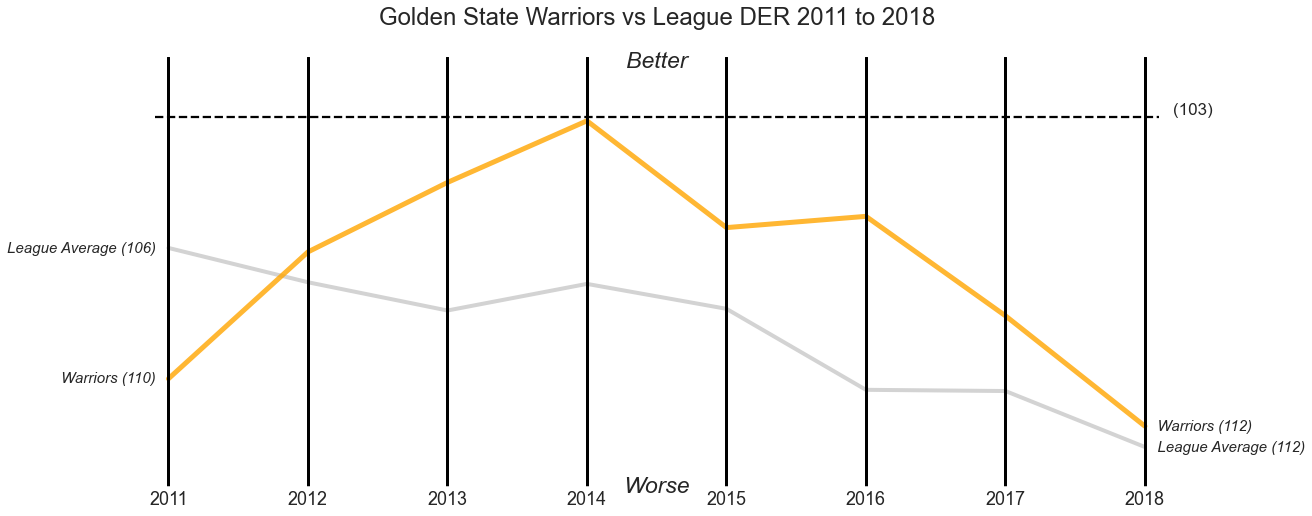

In [35]:
plt.figure(figsize=(18,8))
ax = pd.plotting.parallel_coordinates(DER_final.reset_index(), 'TEAM_NAME', color='lightgrey', lw=4)

pd.plotting.parallel_coordinates(
        DER_gsw_df.reset_index()[DER_gsw_df.reset_index()['TEAM_NAME'] == 'Warriors'], 'TEAM_NAME', ax=ax, 
        axvlines_kwds=dict(color='k', lw=3), 
        color='orange', lw=5, alpha=0.8
    )
p = DER_gsw_df.reset_index()[DER_gsw_df.reset_index()['TEAM_NAME'] == 'Warriors'].reset_index().set_index('TEAM_NAME')
league = DER_final

for team, row in league.iterrows():
        season_2011, season_2018 = row[2011], row[2018]
        
        # Label the markers
        ax.text(0, season_2011, '{} ({})   '.format(team, int(season_2011)), ha='right', va='center', style='oblique', fontsize=15)
        ax.text(7, season_2018, '   {} ({})'.format(team, int(season_2018)), ha='left', va='center', style='oblique', fontsize=15)
        
for team, row in p.iterrows():
        season_2011, season_2018 = row[2011], row[2018]
        
        # Label the markers
        ax.text(0, season_2011, '{} ({})   '.format(team, int(season_2011)), ha='right', va='center', style='oblique', fontsize=15)
        ax.text(7, season_2018, '   {} ({})'.format(team, int(season_2018)), ha='left', va='center', style='oblique', fontsize=15)

ax.set_xlim(-.1, 7.1)
ax.text(0, 114.5, '2011', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(1, 114.5, '2012', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(2, 114.5, '2013', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(3, 114.5, '2014', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(4, 114.5, '2015', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(5, 114.5, '2016', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(6, 114.5, '2017', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(7, 114.5, '2018', ha='center', va='bottom', bbox=dict(facecolor='w'))
ax.text(3.5, ax.get_ylim()[0]-1, 'Better', ha='center', va='bottom', style='oblique', fontsize=23)
ax.text(3.5, ax.get_ylim()[1]+1, 'Worse', ha='center', va='bottom', style='oblique', fontsize=23)

ax.axhline(y=102.8, linestyle='--', c='black')
ax.text(ax.get_xlim()[1]+0.1, 102.7, '(103)', fontsize=17)

ax.set_ylim([101,114])
ax.axis('off')
ax.legend().remove()
ax.grid(False)
ax.invert_yaxis()
ax.set_title('Golden State Warriors vs League DER 2011 to 2018\n', fontsize=24)
plt.savefig('../../../graphs/1101_golden_state_warriors_vs_league_DER.png',bbox_inches='tight');

# 3 point graph
This graph is somewhat unrelated but I wanted to show how much the Golden State Warriors started relying on the 3 point shot in this time period.

In [36]:
seasonal_df.reset_index()

SEASON  TEAM_NAME     TEAM_ID     GAME_ID     FGM     FGA    FG_PCT  \
0      2003      Hawks  1610612737  1674947672  2857.0  6609.0  0.432289   
1      2003    Celtics  1610612738  1836147889  2994.0  6775.0  0.441919   
2      2003  Cavaliers  1610612739  1685248550  2992.0  6903.0  0.433435   
3      2003   Pelicans  1610612740  1946749139  2977.0  7139.0  0.417005   
4      2003      Bulls  1610612741  1654647953  2781.0  6721.0  0.413778   
..      ...        ...         ...         ...     ...     ...       ...   
534    2020       Jazz  1610612762    36000073   118.0   248.0  0.475806   
535    2020  Grizzlies  1610612763    48000117   166.0   368.0  0.451087   
536    2020    Wizards  1610612764    36000095   111.0   264.0  0.420455   
537    2020    Pistons  1610612765    48000098   132.0   322.0  0.409938   
538    2020    Hornets  1610612766    48000105   157.0   353.0  0.444759   

      FG3M    FG3A   FG3_PCT  ...     PTS  POSSESSIONS       PPP         OER  \
0    422.0  1256.0  0.335987  ...  7691.0       7467.0  1.029999  102.999866   
1    577.0  1676.0  0.344272  ...  8238.0       7917.0  1.040546  104.054566   
2    254.0   804.0  0.315920  ...  7802.0       7576.0  1.029831  102.983105   
3    572.0  1796.0  0.318486  ...  8093.0       7813.0  1.035838  103.583771   
4    425.0  1241.0  0.342466  ...  7316.0       7432.0  0.984392   98.439182   
..     ...     ...       ...  ...     ...          ...       ...         ...   
534   53.0   132.0  0.401515  ...   355.0        294.0  1.207483  120.748299   
535   60.0   171.0  0.350877  ...   474.0        433.0  1.094688  109.468822   
536   36.0   115.0  0.313043  ...   299.0        309.0  0.967638   96.763754   
537   49.0   150.0  0.326667  ...   376.0        400.0  0.940000   94.000000   
538   58.0   147.0  0.394558  ...   449.0        423.0  1.061466  106.146572   

     OPP_PTS         DER  POSSESSIONS_OPP        NER   OPP_PPP  CONFERENCE  
0     8075.0  108.084594           7471.0  -5.084728  1.080846        East  
1     8439.0  105.672427           7986.0  -1.617861  1.056724        East  
2     8010.0  105.826397           7569.0  -2.843293  1.058264        East  
3     8122.0  104.154912           7798.0  -0.571141  1.041549        West  
4     7829.0  105.285100           7436.0  -6.845918  1.052851        East  
..       ...         ...              ...        ...       ...         ...  
534    302.0  103.071672            293.0  17.676627  1.030717        West  
535    432.0   99.539171            434.0   9.929652  0.995392        West  
536    312.0  103.311258            302.0  -6.547504  1.033113        East  
537    366.0   90.818859            403.0   3.181141  0.908189        East  
538    458.0  107.764706            425.0  -1.618134  1.077647        East  

[539 rows x 31 columns]

In [37]:
league_three_p = seasonal_df.reset_index()
league_three_p = league_three_p[(league_three_p['SEASON'] > 2010) & (league_three_p['SEASON'] < 2019)]
league_three_p = league_three_p.groupby(['SEASON']).mean()
league_three_p['PER_3P'] = league_three_p['FG3M']/league_three_p['FGM']
league_three_p

TEAM_ID       GAME_ID          FGM          FGA    FG_PCT  \
SEASON                                                                   
2011    1.610613e+09  1.644994e+09  2666.900000  5971.000000  0.445882   
2012    1.610613e+09  2.049652e+09  3489.000000  7739.733333  0.450444   
2013    1.610613e+09  2.073059e+09  3556.033333  7858.500000  0.451955   
2014    1.610613e+09  2.058212e+09  3522.533333  7868.033333  0.447266   
2015    1.610613e+09  2.077652e+09  3580.633333  7963.500000  0.449199   
2016    1.610613e+09  2.064585e+09  3640.433333  7983.166667  0.455551   
2017    1.610613e+09  2.058502e+09  3621.666667  7884.900000  0.458881   
2018    1.610613e+09  2.068078e+09  3751.233333  8179.633333  0.458137   

               FG3M         FG3A   FG3_PCT          FTM          FTA  ...  \
SEASON                                                                ...   
2011     467.600000  1348.800000  0.344343  1257.633333  1673.400000  ...   
2012     675.033333  1892.200000  0.355124  1600.433333  2131.766667  ...   
2013     734.000000  2049.733333  0.356848  1714.666667  2274.300000  ...   
2014     743.366667  2129.466667  0.347450  1647.633333  2206.033333  ...   
2015     805.966667  2288.800000  0.350631  1684.100000  2231.700000  ...   
2016     902.300000  2530.666667  0.355451  1685.633333  2188.933333  ...   
2017     963.633333  2670.733333  0.360493  1532.666667  2003.266667  ...   
2018    1040.566667  2941.600000  0.353631  1648.066667  2150.766667  ...   

                 PTS  POSSESSIONS       PPP         OER       OPP_PTS  \
SEASON                                                                  
2011     7059.033333  6626.100000  1.063612  106.361248   7059.033333   
2012     9253.466667  8600.833333  1.074638  107.463829   9253.466667   
2013     9560.733333  8814.900000  1.083310  108.331045   9560.733333   
2014     9436.066667  8763.233333  1.075213  107.521333   9436.066667   
2015     9651.333333  8902.466667  1.082394  108.239406   9651.333333   
2016     9868.800000  8899.633333  1.107358  110.735799   9868.800000   
2017     9739.633333  8782.566667  1.107609  110.760855   9739.766667   
2018    10191.100000  9055.100000  1.123850  112.385023  10191.100000   

               DER  POSSESSIONS_OPP       NER   OPP_PPP    PER_3P  
SEASON                                                             
2011    106.701889      6626.100000 -0.340641  1.067019  0.175335  
2012    107.727658      8600.833333 -0.263829  1.077277  0.193475  
2013    108.572245      8814.900000 -0.241200  1.085722  0.206410  
2014    107.776357      8763.233333 -0.255024  1.077764  0.211032  
2015    108.521670      8902.466667 -0.282264  1.085217  0.225091  
2016    110.943318      8899.633333 -0.207519  1.109433  0.247855  
2017    110.979240      8782.533333 -0.218385  1.109792  0.266075  
2018    112.653499      9055.100000 -0.268476  1.126535  0.277393  

[8 rows x 29 columns]

In [38]:
gsw_three_p = seasonal_df.reset_index()
gsw_three_p = gsw_three_p[(gsw_three_p['SEASON'] > 2010) & (gsw_three_p['SEASON'] < 2019) & (gsw_three_p['TEAM_NAME'] == 'Warriors')]
gsw_three_p = gsw_three_p.groupby(['SEASON']).mean()
gsw_three_p['PER_3P'] = gsw_three_p['FG3M']/gsw_three_p['FGM']
gsw_three_p

TEAM_ID     GAME_ID     FGM     FGA    FG_PCT    FG3M    FG3A  \
SEASON                                                                     
2011    1610612744  1414834476  2565.0  5615.0  0.456812   531.0  1382.0   
2012    1610612744  2311253047  3855.0  8392.0  0.459366   815.0  2026.0   
2013    1610612744  2114851221  3752.0  8197.0  0.457728   896.0  2374.0   
2014    1610612744  2715458702  4531.0  9528.0  0.475546  1202.0  3059.0   
2015    1610612744  2839558023  4675.0  9763.0  0.478849  1443.0  3536.0   
2016    1610612744  2559655722  4535.0  9206.0  0.492614  1295.0  3362.0   
2017    1610612744  2701955876  4548.0  9143.0  0.497430  1208.0  3155.0   
2018    1610612744  2766256474  4725.0  9705.0  0.486862  1405.0  3690.0   

         FG3_PCT     FTM     FTA  ...      PTS  POSSESSIONS       PPP  \
SEASON                            ...                                   
2011    0.384226   990.0  1289.0  ...   6651.0       6181.0  1.076039   
2012    0.402270  1671.0  2165.0  ...  10196.0       9395.0  1.085258   
2013    0.377422  1540.0  2061.0  ...   9940.0       9131.0  1.088599   
2014    0.392939  1808.0  2409.0  ...  12072.0      10595.0  1.139405   
2015    0.408088  1936.0  2582.0  ...  12729.0      10980.0  1.159290   
2016    0.385187  1955.0  2473.0  ...  12320.0      10407.0  1.183819   
2017    0.382884  1775.0  2187.0  ...  12079.0      10297.0  1.173060   
2018    0.380759  1865.0  2336.0  ...  12720.0      10746.0  1.183696   

               OER  OPP_PTS         DER  POSSESSIONS_OPP        NER   OPP_PPP  \
SEASON                                                                          
2011    107.603948   6869.0  110.611916           6210.0  -3.007969  1.106119   
2012    108.525812  10085.0  106.821311           9441.0   1.704500  1.068213   
2013    108.859928   9582.0  104.744206           9148.0   4.115721  1.047442   
2014    113.940538  10992.0  102.902078          10682.0  11.038460  1.029021   
2015    115.928962  11751.0  106.094258          11076.0   9.834704  1.060943   
2016    118.381858  11058.0  105.757460          10456.0  12.624399  1.057575   
2017    117.306011  11358.0  108.730615          10446.0   8.575397  1.087306   
2018    118.369626  12124.0  112.031048          10822.0   6.338578  1.120310   

          PER_3P  
SEASON            
2011    0.207018  
2012    0.211414  
2013    0.238806  
2014    0.265284  
2015    0.308663  
2016    0.285557  
2017    0.265611  
2018    0.297354  

[8 rows x 29 columns]

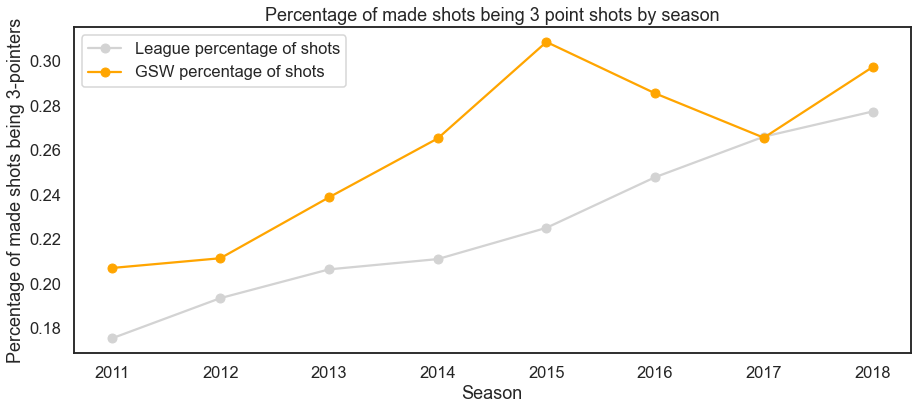

In [39]:
fig, ax = plt.subplots(figsize=(15,6))

x1 = league_three_p
x2 = gsw_three_p
x = x1.loc[2011:2018]

ax.plot(x1['PER_3P'], label="League percentage of shots", marker='o', color='lightgrey')
ax.plot(x2['PER_3P'], label="GSW percentage of shots", marker='o', color='orange')

ax.set_xlabel('Season')
ax.set_ylabel('Percentage of made shots being 3-pointers')
ax.set_xticks([2011,2012,2013,2014,2015,2016,2017,2018])

leg1 = plt.legend(loc='upper left')

ax.set_title('Percentage of made shots being 3 point shots by season')
plt.savefig('../../../graphs/1101_percentage_of_shots_as_3.png',bbox_inches='tight');

# Clear dataframes
This project contains many dataframes. To make sure we don't run out of memory we will delete our dataframes at the end of each notebook.

In [40]:
%reset -f